In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.layers import LSTM, Bidirectional, Dense, Dropout
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [2]:
df= pd.read_csv('heart.csv')

In [3]:
categorical_features = [
    'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'target'  
]
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [4]:
numerical_features = [
    'age', 'trestbps', 'chol', 'thalach', 'oldpeak' 
]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print(df.head())

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0 -0.268437    1   0 -0.377636 -0.659332    0        1  0.821321      0   
1 -0.158157    1   0  0.479107 -0.833861    1        0  0.255968      1   
2  1.716595    1   0  0.764688 -1.396233    0        1 -1.048692      1   
3  0.724079    1   0  0.936037 -0.833861    0        1  0.516900      0   
4  0.834359    0   0  0.364875  0.930822    1        1 -1.874977      0   

    oldpeak  slope  ca  thal  target  
0 -0.060888      2   2     3       0  
1  1.727137      0   0     3       0  
2  1.301417      0   0     3       0  
3 -0.912329      2   1     3       0  
4  0.705408      1   3     2       0  


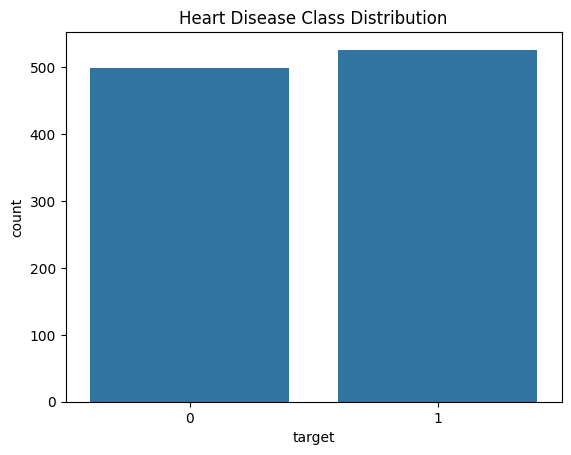

target
1    526
0    499
Name: count, dtype: int64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot to check class distribution
sns.countplot(x=df['target'])
plt.title("Heart Disease Class Distribution")
plt.show()

# Print class distribution
print(df['target'].value_counts())

# Random Forest+Modified GA

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Load dataset
df = pd.read_csv('heart.csv')

# Encode categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'target']
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Scale numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Separate features and target
X = df.drop(columns=['target']).values
y = df['target'].values

# Fitness function using Stratified K-Fold Cross-Validation
def fitness_function(chromosome, X, y):
    selected_features = np.where(chromosome == 1)[0]
    if len(selected_features) == 0:
        return 0  # Avoid empty feature sets

    X_selected = X[:, selected_features]
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    accuracy_scores = []

    for train_idx, val_idx in skf.split(X_selected, y):
        X_train, X_val = X_selected[train_idx], X_selected[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
        model.fit(X_train, y_train)
        accuracy_scores.append(accuracy_score(y_val, model.predict(X_val)))

    return np.mean(accuracy_scores)

# Modified Genetic Algorithm for Feature Selection
def modified_genetic_algorithm(X, y, num_generations=50, population_size=20, mutation_rate=0.1):
    num_features = X.shape[1]
    population = np.random.randint(2, size=(population_size, num_features))

    for generation in range(num_generations):
        fitness_scores = np.array([fitness_function(chrom, X, y) for chrom in population])
        sorted_indices = np.argsort(fitness_scores)[::-1]
        population = population[sorted_indices]

        if fitness_scores[0] - fitness_scores[-1] <= 0.01:  # Convergence check
            break

        parents = population[:4]  # Select top 4 parents
        offspring = np.mean(parents, axis=0) > 0.5  # Crossover strategy
        offspring = np.array(offspring, dtype=int)  # Convert boolean to int

        # Mutation
        mutation_mask = np.random.rand(*offspring.shape) < mutation_rate
        offspring[mutation_mask] = 1 - offspring[mutation_mask]

        if fitness_function(offspring, X, y) > fitness_scores[-1]:
            population[-1] = offspring  # Replace worst individual

    return population[0]

# Run Modified Genetic Algorithm
best_chromosome = modified_genetic_algorithm(X, y)
selected_features = np.where(best_chromosome == 1)[0]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED, stratify=y)

# Train Random Forest with selected features
rf_model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
rf_model.fit(X_train[:, selected_features], y_train)

# Test the Model
y_pred = rf_model.predict(X_test[:, selected_features])
test_accuracy_rf = accuracy_score(y_test, y_pred)

# Output Results
print("Best Feature Selection:", best_chromosome)
print("Test Accuracy (Random Forest):", test_accuracy_rf)
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Test the Model
y_pred = rf_model.predict(X_test[:, selected_features])
y_proba = rf_model.predict_proba(X_test[:, selected_features])[:, 1]  # For AUC-ROC

# Evaluation Metrics
test_precision_rf = precision_score(y_test, y_pred)
test_recall_rf = recall_score(y_test, y_pred)
test_auc_rf = roc_auc_score(y_test, y_proba)

# Output Results
print("Test Precision (Random Forest):", test_precision_rf)
print("Test Recall (Random Forest):", test_recall_rf)
print("Test AUC-ROC (Random Forest):", test_auc_rf)

Best Feature Selection: [1 1 0 1 0 1 0 0 1 1 0 1 1]
Test Accuracy (Random Forest): 1.0
Test Precision (Random Forest): 1.0
Test Recall (Random Forest): 1.0
Test AUC-ROC (Random Forest): 1.0


# XGBoost+Modified GA

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Set a fixed random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Load dataset
df = pd.read_csv('heart.csv')

# Encode categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'target']
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Scale numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Define features and target variable
X = df.drop(columns=['target']).values
y = df['target'].values

# Fitness function using Stratified K-Fold Cross-Validation
def fitness_function(chromosome, X, y):
    selected_features = np.where(chromosome == 1)[0]
    if len(selected_features) == 0:
        return 0  # Avoid empty feature sets

    X_selected = X[:, selected_features]
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    accuracy_scores = []

    for train_idx, val_idx in skf.split(X_selected, y):
        X_train, X_val = X_selected[train_idx], X_selected[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = XGBClassifier(n_estimators=100, max_depth=3, min_child_weight=3, random_state=RANDOM_SEED)
        model.fit(X_train, y_train)
        accuracy_scores.append(accuracy_score(y_val, model.predict(X_val)))

    return np.mean(accuracy_scores)  # Return average accuracy

# Modified Genetic Algorithm for Feature Selection
def modified_genetic_algorithm(X, y, num_generations=50, population_size=20, mutation_rate=0.1):
    num_features = X.shape[1]
    population = np.random.randint(2, size=(population_size, num_features))

    for generation in range(num_generations):
        fitness_scores = np.array([fitness_function(chrom, X, y) for chrom in population])
        sorted_indices = np.argsort(fitness_scores)[::-1]
        population = population[sorted_indices]

        if fitness_scores[0] - fitness_scores[-1] <= 0.01:  # Convergence check
            break

        parents = population[:4]  # Select top 4 parents
        offspring = np.mean(parents, axis=0) > 0.5  # Crossover strategy
        offspring = np.array(offspring, dtype=int)

        # Mutation
        mutation_mask = np.random.rand(*offspring.shape) < mutation_rate
        offspring[mutation_mask] = 1 - offspring[mutation_mask]

        if fitness_function(offspring, X, y) > fitness_scores[-1]:
            population[-1] = offspring  # Replace worst individual

    return population[0]  # Return best chromosome

# Run Modified Genetic Algorithm
best_chromosome = modified_genetic_algorithm(X, y)
selected_features = np.where(best_chromosome == 1)[0]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED, stratify=y)

# Train XGBoost with selected features
xgb_model = XGBClassifier(
    n_estimators=100, max_depth=3, min_child_weight=3, random_state=RANDOM_SEED
)

# Train the model (NO EARLY STOPPING)
xgb_model.fit(X_train[:, selected_features], y_train)

# Test the Model
y_pred = xgb_model.predict(X_test[:, selected_features])
test_accuracy_xgb = accuracy_score(y_test, y_pred)

# Output Results
print("Best Feature Selection:", best_chromosome)
print("Test Accuracy (XGBoost):", test_accuracy_xgb)
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Test the Model
y_pred = xgb_model.predict(X_test[:, selected_features])
y_proba = xgb_model.predict_proba(X_test[:, selected_features])[:, 1]  # For AUC-ROC

# Evaluation Metrics
test_precision_xgb = precision_score(y_test, y_pred)
test_recall_xgb = recall_score(y_test, y_pred)
test_auc_xgb = roc_auc_score(y_test, y_proba)

# Output Results
print("Test Precision (XGBoost):", test_precision_xgb)
print("Test Recall (XGBoost):", test_recall_xgb)
print("Test AUC-ROC (XGBoost):", test_auc_xgb)


Best Feature Selection: [1 1 1 1 1 1 1 1 0 0 1 1 1]
Test Accuracy (XGBoost): 0.9922178988326849
Test Precision (XGBoost): 1.0
Test Recall (XGBoost): 0.9848484848484849
Test AUC-ROC (XGBoost): 0.9995151515151516


# Logistic Regression+Modified GA

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Set a fixed random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Load dataset
df = pd.read_csv('heart.csv')

# Encode categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'target']
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Scale numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Define features and target variable
X = df.drop(columns=['target']).values
y = df['target'].values

# Fitness function using Stratified K-Fold Cross-Validation
def fitness_function(chromosome, X, y):
    selected_features = np.where(chromosome == 1)[0]
    if len(selected_features) == 0:
        return 0  # Avoid empty feature sets

    X_selected = X[:, selected_features]
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    accuracy_scores = []

    for train_idx, val_idx in skf.split(X_selected, y):
        X_train, X_val = X_selected[train_idx], X_selected[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = LogisticRegression(max_iter=500, random_state=RANDOM_SEED)
        model.fit(X_train, y_train)
        accuracy_scores.append(accuracy_score(y_val, model.predict(X_val)))

    return np.mean(accuracy_scores)  # Return average accuracy

# Modified Genetic Algorithm for Feature Selection
def modified_genetic_algorithm(X, y, num_generations=50, population_size=20, mutation_rate=0.1):
    num_features = X.shape[1]
    population = np.random.randint(2, size=(population_size, num_features))

    for generation in range(num_generations):
        fitness_scores = np.array([fitness_function(chrom, X, y) for chrom in population])
        sorted_indices = np.argsort(fitness_scores)[::-1]
        population = population[sorted_indices]

        if fitness_scores[0] - fitness_scores[-1] <= 0.01:  # Convergence check
            break

        parents = population[:4]  # Select top 4 parents
        offspring = np.mean(parents, axis=0) > 0.5  # Crossover strategy
        offspring = np.array(offspring, dtype=int)

        # Mutation
        mutation_mask = np.random.rand(*offspring.shape) < mutation_rate
        offspring[mutation_mask] = 1 - offspring[mutation_mask]

        if fitness_function(offspring, X, y) > fitness_scores[-1]:
            population[-1] = offspring  # Replace worst individual

    return population[0]  # Return best chromosome

# Run Modified Genetic Algorithm
best_chromosome = modified_genetic_algorithm(X, y)
selected_features = np.where(best_chromosome == 1)[0]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED, stratify=y)

# Train Logistic Regression with selected features
logreg_model = LogisticRegression(max_iter=500, random_state=RANDOM_SEED)

# Train the model (NO EARLY STOPPING)
logreg_model.fit(X_train[:, selected_features], y_train)

# Test the Model
y_pred = logreg_model.predict(X_test[:, selected_features])
test_accuracy_logreg = accuracy_score(y_test, y_pred)

# Output Results
print("Best Feature Selection:", best_chromosome)
print("Test Accuracy (Logistic Regression):", test_accuracy_logreg)
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Test the Model
y_pred = logreg_model.predict(X_test[:, selected_features])
y_proba = logreg_model.predict_proba(X_test[:, selected_features])[:, 1]  # For AUC-ROC

# Evaluation Metrics
test_precision_logreg = precision_score(y_test, y_pred)
test_recall_logreg = recall_score(y_test, y_pred)
test_auc_logreg = roc_auc_score(y_test, y_proba)

# Output Results
print("Test Precision (Logistic Regression):", test_precision_logreg)
print("Test Recall (Logistic Regression):", test_recall_logreg)
print("Test AUC-ROC (Logistic Regression):", test_auc_logreg)

Best Feature Selection: [0 1 1 1 1 0 1 0 0 1 1 1 1]
Test Accuracy (Logistic Regression): 0.8287937743190662
Test Precision (Logistic Regression): 0.8142857142857143
Test Recall (Logistic Regression): 0.8636363636363636
Test AUC-ROC (Logistic Regression): 0.9095151515151515


# KNN+Modified GA

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Set a fixed random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Load dataset
df = pd.read_csv('heart.csv')

# Encode categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'target']
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Scale numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Define features and target variable
X = df.drop(columns=['target']).values
y = df['target'].values

# Fitness function using Stratified K-Fold Cross-Validation
def fitness_function(chromosome, X, y):
    selected_features = np.where(chromosome == 1)[0]
    if len(selected_features) == 0:
        return 0  # Avoid empty feature sets

    X_selected = X[:, selected_features]
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    accuracy_scores = []

    for train_idx, val_idx in skf.split(X_selected, y):
        X_train, X_val = X_selected[train_idx], X_selected[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = KNeighborsClassifier(n_neighbors=5)  # Using KNN
        model.fit(X_train, y_train)
        accuracy_scores.append(accuracy_score(y_val, model.predict(X_val)))

    return np.mean(accuracy_scores)  # Return average accuracy

# Modified Genetic Algorithm for Feature Selection
def modified_genetic_algorithm(X, y, num_generations=50, population_size=20, mutation_rate=0.1):
    num_features = X.shape[1]
    population = np.random.randint(2, size=(population_size, num_features))

    for generation in range(num_generations):
        fitness_scores = np.array([fitness_function(chrom, X, y) for chrom in population])
        sorted_indices = np.argsort(fitness_scores)[::-1]
        population = population[sorted_indices]

        if fitness_scores[0] - fitness_scores[-1] <= 0.01:  # Convergence check
            break

        parents = population[:4]  # Select top 4 parents
        offspring = np.mean(parents, axis=0) > 0.5  # Crossover strategy
        offspring = np.array(offspring, dtype=int)

        # Mutation
        mutation_mask = np.random.rand(*offspring.shape) < mutation_rate
        offspring[mutation_mask] = 1 - offspring[mutation_mask]

        if fitness_function(offspring, X, y) > fitness_scores[-1]:
            population[-1] = offspring  # Replace worst individual

    return population[0]  # Return best chromosome

# Run Modified Genetic Algorithm
best_chromosome = modified_genetic_algorithm(X, y)
selected_features = np.where(best_chromosome == 1)[0]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED, stratify=y)

# Train KNN with selected features
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model (NO EARLY STOPPING)
knn_model.fit(X_train[:, selected_features], y_train)

# Test the Model
y_pred = knn_model.predict(X_test[:, selected_features])
test_accuracy_knn = accuracy_score(y_test, y_pred)

# Output Results
print("Best Feature Selection:", best_chromosome)
print("Test Accuracy (KNN):", test_accuracy_knn)
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Evaluation Metrics
y_proba = knn_model.predict_proba(X_test[:, selected_features])[:, 1]  # For AUC-ROC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_proba)

# Output Results
print("Test Precision (KNN):", precision)
print("Test Recall (KNN):", recall)
print("Test AUC-ROC (KNN):", auc_roc)

Best Feature Selection: [1 1 0 1 0 1 0 0 1 1 0 1 1]
Test Accuracy (KNN): 0.8521400778210116
Test Precision (KNN): 0.873015873015873
Test Recall (KNN): 0.8333333333333334
Test AUC-ROC (KNN): 0.9519090909090909


# SVM+Modified GA

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Load dataset
df = pd.read_csv('heart.csv')

# Encode categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'target']
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Scale numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Split features and target variable
X = df.drop(columns=['target']).values  # Feature matrix
y = df['target'].values  # Target variable

# Fitness function using Stratified K-Fold Cross-Validation
def fitness_function(chromosome, X, y):
    selected_features = np.where(chromosome == 1)[0]
    if len(selected_features) == 0:
        return 0  # Avoid empty feature sets

    X_selected = X[:, selected_features]  # Select features based on chromosome
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)
    accuracy_scores = []

    for train_idx, val_idx in skf.split(X_selected, y):
        X_train, X_val = X_selected[train_idx], X_selected[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = SVC(kernel='linear', random_state=random_seed)  # Using SVM
        model.fit(X_train, y_train)
        accuracy_scores.append(accuracy_score(y_val, model.predict(X_val)))

    return np.mean(accuracy_scores)  # Return average accuracy

# Modified Genetic Algorithm for Feature Selection
def genetic_algorithm(X, y, num_generations=50, population_size=20, mutation_rate=0.1):
    num_features = X.shape[1]
    population = np.random.randint(2, size=(population_size, num_features))

    for generation in range(num_generations):
        fitness_scores = np.array([fitness_function(chrom, X, y) for chrom in population])
        sorted_indices = np.argsort(fitness_scores)[::-1]
        population = population[sorted_indices]

        if fitness_scores[0] - fitness_scores[-1] <= 0.01:  # Convergence check
            break

        parents = population[:4]  # Select top 4 parents
        offspring = np.mean(parents, axis=0) > 0.5  # Crossover strategy
        offspring = np.array(offspring, dtype=int)  # Convert boolean to int

        # Mutation
        mutation_mask = np.random.rand(*offspring.shape) < mutation_rate
        offspring[mutation_mask] = 1 - offspring[mutation_mask]

        if fitness_function(offspring, X, y) > fitness_scores[-1]:
            population[-1] = offspring  # Replace worst individual

    return population[0]  # Return best chromosome

# Run Modified Genetic Algorithm
best_chromosome = genetic_algorithm(X, y)
selected_features = np.where(best_chromosome == 1)[0]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed, stratify=y)

# Train SVM with selected features
svm_model = SVC(kernel='linear', random_state=random_seed)

# Train the model (NO EARLY STOPPING)
svm_model.fit(X_train[:, selected_features], y_train)

# Test the Model
y_pred = svm_model.predict(X_test[:, selected_features])
test_accuracy_svm = accuracy_score(y_test, y_pred)

# Output Results
print("Best Feature Selection:", best_chromosome)
print("Test Accuracy (SVM):", test_accuracy_svm)
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Evaluation Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# SVM does not support predict_proba by default, so use decision_function + normalization
decision_scores = svm_model.decision_function(X_test[:, selected_features])
# Normalize decision function to [0,1] for AUC-ROC
normalized_scores = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
auc_roc = roc_auc_score(y_test, normalized_scores)

# Output Results
print("Test Precision (SVM):", precision)
print("Test Recall (SVM):", recall)
print("Test AUC-ROC (SVM):", auc_roc)

Best Feature Selection: [1 1 1 1 1 1 1 1 0 0 1 1 1]
Test Accuracy (SVM): 0.8365758754863813
Test Precision (SVM): 0.7960526315789473
Test Recall (SVM): 0.9166666666666666
Test AUC-ROC (SVM): 0.8980606060606061


# Decision Tree+Modified GA

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Load dataset
df = pd.read_csv('heart.csv')

# Encode categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'target']
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Scale numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Split features and target variable
X = df.drop(columns=['target']).values  # Feature matrix
y = df['target'].values  # Target variable

# Fitness function using Stratified K-Fold Cross-Validation
def fitness_function(chromosome, X, y):
    selected_features = np.where(chromosome == 1)[0]
    if len(selected_features) == 0:
        return 0  # Avoid empty feature sets

    X_selected = X[:, selected_features]  # Select features based on chromosome
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)
    accuracy_scores = []

    for train_idx, val_idx in skf.split(X_selected, y):
        X_train, X_val = X_selected[train_idx], X_selected[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = DecisionTreeClassifier(random_state=random_seed)  # Using Decision Tree
        model.fit(X_train, y_train)
        accuracy_scores.append(accuracy_score(y_val, model.predict(X_val)))

    return np.mean(accuracy_scores)  # Return average accuracy

# Genetic Algorithm for Feature Selection
def genetic_algorithm(X, y, num_generations=50, population_size=20, mutation_rate=0.1):
    num_features = X.shape[1]
    population = np.random.randint(2, size=(population_size, num_features))

    for generation in range(num_generations):
        fitness_scores = np.array([fitness_function(chrom, X, y) for chrom in population])
        sorted_indices = np.argsort(fitness_scores)[::-1]
        population = population[sorted_indices]

        if fitness_scores[0] - fitness_scores[-1] <= 0.01:  # Convergence check
            break

        parents = population[:4]  # Select top 4 parents
        offspring = np.mean(parents, axis=0) > 0.5  # Crossover strategy
        offspring = np.array(offspring, dtype=int)  # Convert boolean to int

        # Mutation
        mutation_mask = np.random.rand(*offspring.shape) < mutation_rate
        offspring[mutation_mask] = 1 - offspring[mutation_mask]

        if fitness_function(offspring, X, y) > fitness_scores[-1]:
            population[-1] = offspring  # Replace worst individual

    return population[0]  # Return best chromosome

# Run Genetic Algorithm
best_chromosome = genetic_algorithm(X, y)
selected_features = np.where(best_chromosome == 1)[0]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed, stratify=y)

# Train Decision Tree with selected features
dt_model = DecisionTreeClassifier(random_state=random_seed)
dt_model.fit(X_train[:, selected_features], y_train)

# Test the Model
y_pred = dt_model.predict(X_test[:, selected_features])
test_accuracy_dt = accuracy_score(y_test, y_pred)

# Output Results
print("Best Feature Selection:", best_chromosome)
print("Test Accuracy (Decision Tree):", test_accuracy_dt)
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Evaluation Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# For AUC-ROC, use predict_proba if available
if hasattr(dt_model, "predict_proba"):
    y_proba = dt_model.predict_proba(X_test[:, selected_features])[:, 1]
    auc_roc = roc_auc_score(y_test, y_proba)
else:
    auc_roc = roc_auc_score(y_test, y_pred)  # Fallback in case predict_proba is not supported

# Output Results
print("Test Precision (Decision Tree):", precision)
print("Test Recall (Decision Tree):", recall)
print("Test AUC-ROC (Decision Tree):", auc_roc)

Best Feature Selection: [1 1 1 1 0 1 1 0 1 0 0 1 0]
Test Accuracy (Decision Tree): 1.0
Test Precision (Decision Tree): 1.0
Test Recall (Decision Tree): 1.0
Test AUC-ROC (Decision Tree): 1.0


# Naive Bayes+Modified GA

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Load dataset
df = pd.read_csv('heart.csv')

# Encode categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'target']
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Scale numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Split features and target variable
X = df.drop(columns=['target']).values  # Feature matrix
y = df['target'].values  # Target variable

# Fitness function using Stratified K-Fold Cross-Validation
def fitness_function(chromosome, X, y):
    selected_features = np.where(chromosome == 1)[0]
    if len(selected_features) == 0:
        return 0  # Avoid empty feature sets

    X_selected = X[:, selected_features]  # Select features based on chromosome
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)
    accuracy_scores = []

    for train_idx, val_idx in skf.split(X_selected, y):
        X_train, X_val = X_selected[train_idx], X_selected[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = GaussianNB()  # Using Naïve Bayes
        model.fit(X_train, y_train)
        accuracy_scores.append(accuracy_score(y_val, model.predict(X_val)))

    return np.mean(accuracy_scores)  # Return average accuracy

# Genetic Algorithm for Feature Selection
def genetic_algorithm(X, y, num_generations=50, population_size=20, mutation_rate=0.1):
    num_features = X.shape[1]
    population = np.random.randint(2, size=(population_size, num_features))

    for generation in range(num_generations):
        fitness_scores = np.array([fitness_function(chrom, X, y) for chrom in population])
        sorted_indices = np.argsort(fitness_scores)[::-1]
        population = population[sorted_indices]

        if fitness_scores[0] - fitness_scores[-1] <= 0.01:  # Convergence check
            break

        parents = population[:4]  # Select top 4 parents
        offspring = np.mean(parents, axis=0) > 0.5  # Crossover strategy
        offspring = np.array(offspring, dtype=int)  # Convert boolean to int

        # Mutation
        mutation_mask = np.random.rand(*offspring.shape) < mutation_rate
        offspring[mutation_mask] = 1 - offspring[mutation_mask]

        if fitness_function(offspring, X, y) > fitness_scores[-1]:
            population[-1] = offspring  # Replace worst individual

    return population[0]  # Return best chromosome

# Run Genetic Algorithm
best_chromosome = genetic_algorithm(X, y)
selected_features = np.where(best_chromosome == 1)[0]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed, stratify=y)

# Train Naïve Bayes with selected features
nb_model = GaussianNB()
nb_model.fit(X_train[:, selected_features], y_train)

# Test the Model
y_pred = nb_model.predict(X_test[:, selected_features])
test_accuracy_nb = accuracy_score(y_test, y_pred)

# Output Results
print("Best Feature Selection:", best_chromosome)
print("Test Accuracy (Naïve Bayes):", test_accuracy_nb)
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Evaluation Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# AUC-ROC using predicted probabilities
y_proba = nb_model.predict_proba(X_test[:, selected_features])[:, 1]
auc_roc = roc_auc_score(y_test, y_proba)

# Output Results
print("Test Precision (Naïve Bayes):", precision)
print("Test Recall (Naïve Bayes):", recall)
print("Test AUC-ROC (Naïve Bayes):", auc_roc)

Best Feature Selection: [0 1 1 1 1 0 1 0 0 1 1 1 1]
Test Accuracy (Naïve Bayes): 0.8404669260700389
Test Precision (Naïve Bayes): 0.8273381294964028
Test Recall (Naïve Bayes): 0.8712121212121212
Test AUC-ROC (Naïve Bayes): 0.9074545454545455


# LightGBM+Modified GA

In [8]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Load dataset
df = pd.read_csv('heart.csv')

# Encode categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'target']
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Scale numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Split features and target variable
X = df.drop(columns=['target']).values  # Feature matrix
y = df['target'].values  # Target variable

# Fitness function using Stratified K-Fold Cross-Validation
def fitness_function(chromosome, X, y):
    selected_features = np.where(chromosome == 1)[0]
    if len(selected_features) == 0:
        return 0  # Avoid empty feature sets

    X_selected = X[:, selected_features]  # Select features based on chromosome
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)
    accuracy_scores = []

    for train_idx, val_idx in skf.split(X_selected, y):
        X_train, X_val = X_selected[train_idx], X_selected[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=random_seed, verbose=-1)
        model.fit(X_train, y_train)
        accuracy_scores.append(accuracy_score(y_val, model.predict(X_val)))

    return np.mean(accuracy_scores)  # Return average accuracy

# Genetic Algorithm for Feature Selection
def genetic_algorithm(X, y, num_generations=50, population_size=20, mutation_rate=0.1):
    num_features = X.shape[1]
    population = np.random.randint(2, size=(population_size, num_features))

    for generation in range(num_generations):
        fitness_scores = np.array([fitness_function(chrom, X, y) for chrom in population])
        sorted_indices = np.argsort(fitness_scores)[::-1]
        population = population[sorted_indices]

        if fitness_scores[0] - fitness_scores[-1] <= 0.01:  # Convergence check
            break

        parents = population[:4]  # Select top 4 parents
        offspring = np.mean(parents, axis=0) > 0.5  # Crossover strategy
        offspring = np.array(offspring, dtype=int)  # Convert boolean to int

        # Mutation
        mutation_mask = np.random.rand(*offspring.shape) < mutation_rate
        offspring[mutation_mask] = 1 - offspring[mutation_mask]

        if fitness_function(offspring, X, y) > fitness_scores[-1]:
            population[-1] = offspring  # Replace worst individual

    return population[0]  # Return best chromosome

# Run Genetic Algorithm
best_chromosome = genetic_algorithm(X, y)
selected_features = np.where(best_chromosome == 1)[0]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed, stratify=y)

# Train LightGBM with selected features
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=random_seed)
lgb_model.fit(X_train[:, selected_features], y_train)

# Test the Model
y_pred = lgb_model.predict(X_test[:, selected_features])
test_accuracy_lgb = accuracy_score(y_test, y_pred)

# Output Results
print("Best Feature Selection:", best_chromosome)
print("Test Accuracy (LightGBM):", test_accuracy_lgb)
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Evaluation Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# AUC-ROC using predicted probabilities
y_proba = lgb_model.predict_proba(X_test[:, selected_features])[:, 1]
auc_roc = roc_auc_score(y_test, y_proba)

# Output Results
print("Test Precision (LightGBM):", precision)
print("Test Recall (LightGBM):", recall)
print("Test AUC-ROC (LightGBM):", auc_roc)

Best Feature Selection: [1 1 1 1 1 1 1 1 0 0 1 1 1]
Test Accuracy (LightGBM): 1.0
Test Precision (LightGBM): 1.0
Test Recall (LightGBM): 1.0
Test AUC-ROC (LightGBM): 1.0


# CNN+Modified GA

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings

# Enable warnings
warnings.filterwarnings("default")

# Set fixed random seed for full reproducibility
RANDOM_SEED = 42
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Ensure TensorFlow operates deterministically
tf.config.experimental.enable_op_determinism()

# Load dataset
df = pd.read_csv('heart.csv')

# Encode categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'target']
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Scale numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Define features and target variable
X = df.drop(columns=['target']).values.astype(np.float32)
y = df['target'].values.astype(np.int32)

# Fitness function using Stratified K-Fold CV with Logistic Regression
def fitness_function(chromosome, X, y):
    selected_features = np.where(chromosome == 1)[0]
    if len(selected_features) == 0:
        return 0  # Avoid empty feature sets

    X_selected = X[:, selected_features]
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)  # Fewer splits for speed
    accuracy_scores = []

    for train_idx, val_idx in skf.split(X_selected, y):
        X_train, X_val = X_selected[train_idx], X_selected[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Logistic Regression for fast evaluation
        model = LogisticRegression(max_iter=100, solver='liblinear', random_state=RANDOM_SEED)
        model.fit(X_train, y_train)
        accuracy_scores.append(accuracy_score(y_val, model.predict(X_val)))

    return np.mean(accuracy_scores)

# Optimized Genetic Algorithm for Faster Feature Selection
def fast_genetic_algorithm(X, y, num_generations=20, population_size=10, mutation_rate=0.05):
    num_features = X.shape[1]
    population = np.random.randint(2, size=(population_size, num_features))

    for generation in range(num_generations):
        fitness_scores = np.array([fitness_function(chrom, X, y) for chrom in population])
        sorted_indices = np.argsort(fitness_scores)[::-1]
        population = population[sorted_indices]

        # Early stopping if fitness doesn't improve significantly
        if fitness_scores[0] - fitness_scores[-1] <= 0.005:
            break

        # Select top 2 parents
        parents = population[:2]

        # Create new offspring using uniform crossover
        offspring = (parents[0] + parents[1]) // 2
        offspring = np.array(offspring, dtype=int)

        # Apply mutation
        mutation_mask = np.random.rand(*offspring.shape) < mutation_rate
        offspring[mutation_mask] = 1 - offspring[mutation_mask]

        if fitness_function(offspring, X, y) > fitness_scores[-1]:
            population[-1] = offspring  # Replace worst individual

    return population[0]  # Return best chromosome

# Run Optimized GA for Feature Selection
best_chromosome = fast_genetic_algorithm(X, y)
selected_features = np.where(best_chromosome == 1)[0]

# Train/Test Split (70-30) using the best-selected features
X_train, X_test, y_train, y_test = train_test_split(X[:, selected_features], y, test_size=0.25, random_state=RANDOM_SEED, stratify=y)

# Build Final CNN Model
cnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN Model (Reduced Epochs for Speed)
cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Test the Model
y_pred = (cnn_model.predict(X_test) > 0.5).astype(int)
test_accuracy_cnn = accuracy_score(y_test, y_pred)

# Output Results
print("Best Feature Selection:", best_chromosome)
print("Selected Feature Count:", len(selected_features))
print("Test Accuracy (CNN with 75-25 split):", test_accuracy_cnn)
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Evaluation Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# AUC-ROC using predicted probabilities
y_proba = cnn_model.predict(X_test)  # Get probabilities from CNN
auc_roc = roc_auc_score(y_test, y_proba)

# Output Results
print("Test Precision (CNN):", precision)
print("Test Recall (CNN):", recall)
print("Test AUC-ROC (CNN):", auc_roc)

Epoch 1/5


C:\Users\Anmol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5364 - loss: 0.6924   
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7353 - loss: 0.5949 
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8008 - loss: 0.5023 
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.8095 - loss: 0.4529
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7927 - loss: 0.4196 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Best Feature Selection: [1 1 1 1 1 0 1 0 1 1 0 1 0]
Selected Feature Count: 9
Test Accuracy (CNN with 75-25 split): 0.7782101167315175
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
Test Precision (CNN): 0.7659574468085106
Test Recall (CNN): 0.8181818181818182
Test AUC-ROC (CNN): 0.8936969696969698


# LSTM+Modified GA

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings

# Enable warnings
warnings.filterwarnings("default")

# Set fixed random seed for full reproducibility
RANDOM_SEED = 42
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Ensure TensorFlow operates deterministically
tf.config.experimental.enable_op_determinism()

# Load dataset
df = pd.read_csv('heart.csv')

# Encode categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'target']
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Scale numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Define features and target variable
X = df.drop(columns=['target']).values.astype(np.float32)
y = df['target'].values.astype(np.int32)

# Fitness function using Stratified K-Fold CV with Logistic Regression
def fitness_function(chromosome, X, y):
    selected_features = np.where(chromosome == 1)[0]
    if len(selected_features) == 0:
        return 0  # Avoid empty feature sets

    X_selected = X[:, selected_features]
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    accuracy_scores = []

    for train_idx, val_idx in skf.split(X_selected, y):
        X_train, X_val = X_selected[train_idx], X_selected[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Logistic Regression for fast evaluation
        model = LogisticRegression(max_iter=100, solver='liblinear', random_state=RANDOM_SEED)
        model.fit(X_train, y_train)
        accuracy_scores.append(accuracy_score(y_val, model.predict(X_val)))

    return np.mean(accuracy_scores)

# Optimized Genetic Algorithm for Faster Feature Selection
def fast_genetic_algorithm(X, y, num_generations=20, population_size=10, mutation_rate=0.05):
    num_features = X.shape[1]
    population = np.random.randint(2, size=(population_size, num_features))

    for generation in range(num_generations):
        fitness_scores = np.array([fitness_function(chrom, X, y) for chrom in population])
        sorted_indices = np.argsort(fitness_scores)[::-1]
        population = population[sorted_indices]

        # Early stopping if fitness doesn't improve significantly
        if fitness_scores[0] - fitness_scores[-1] <= 0.005:
            break

        # Select top 2 parents
        parents = population[:2]

        # Create new offspring using uniform crossover
        offspring = (parents[0] + parents[1]) // 2
        offspring = np.array(offspring, dtype=int)

        # Apply mutation
        mutation_mask = np.random.rand(*offspring.shape) < mutation_rate
        offspring[mutation_mask] = 1 - offspring[mutation_mask]

        if fitness_function(offspring, X, y) > fitness_scores[-1]:
            population[-1] = offspring  # Replace worst individual

    return population[0]  # Return best chromosome

# Run Optimized GA for Feature Selection
best_chromosome = fast_genetic_algorithm(X, y)
selected_features = np.where(best_chromosome == 1)[0]

# Train/Test Split (70-30) using the best-selected features
X_train, X_test, y_train, y_test = train_test_split(X[:, selected_features], y, test_size=0.25, random_state=RANDOM_SEED, stratify=y)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build Final LSTM Model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM Model (Reduced Epochs for Speed)
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Test the Model
y_pred = (lstm_model.predict(X_test) > 0.5).astype(int)
test_accuracy_lstm = accuracy_score(y_test, y_pred)

# Output Results
print("Best Feature Selection:", best_chromosome)
print("Selected Feature Count:", len(selected_features))
print("Test Accuracy (LSTM with 75-25 split):", test_accuracy_lstm)
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Evaluation Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# AUC-ROC using predicted probabilities
y_proba = lstm_model.predict(X_test)  # Get probabilities from LSTM
auc_roc = roc_auc_score(y_test, y_proba)

# Output Results
print("Test Precision (LSTM):", precision)
print("Test Recall (LSTM):", recall)
print("Test AUC-ROC (LSTM):", auc_roc)

Epoch 1/5


C:\Users\Anmol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5600 - loss: 0.6893
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6738 - loss: 0.6327
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6958 - loss: 0.5687
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7132 - loss: 0.5640
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7452 - loss: 0.5364 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Best Feature Selection: [1 1 1 1 1 0 1 0 1 1 0 1 0]
Selected Feature Count: 9
Test Accuracy (LSTM with 75-25 split): 0.77431906614786
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Precision (LSTM): 0.7846153846153846
Test Recall (LSTM): 0.7727272727272727
Test AUC-ROC (LSTM): 0.8444242424242424


# MLP+Modified GA

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings

# Enable warnings
warnings.filterwarnings("default")

# Set fixed random seed for full reproducibility
RANDOM_SEED = 42
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Ensure TensorFlow operates deterministically
tf.config.experimental.enable_op_determinism()

# Load dataset
df = pd.read_csv('heart.csv')

# Encode categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'target']
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Scale numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Define features and target variable
X = df.drop(columns=['target']).values.astype(np.float32)
y = df['target'].values.astype(np.int32)

# Fitness function using Stratified K-Fold CV with Logistic Regression
def fitness_function(chromosome, X, y):
    selected_features = np.where(chromosome == 1)[0]
    if len(selected_features) == 0:
        return 0  # Avoid empty feature sets

    X_selected = X[:, selected_features]
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    accuracy_scores = []

    for train_idx, val_idx in skf.split(X_selected, y):
        X_train, X_val = X_selected[train_idx], X_selected[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Logistic Regression for fast evaluation
        model = LogisticRegression(max_iter=100, solver='liblinear', random_state=RANDOM_SEED)
        model.fit(X_train, y_train)
        accuracy_scores.append(accuracy_score(y_val, model.predict(X_val)))

    return np.mean(accuracy_scores)

# Optimized Genetic Algorithm for Faster Feature Selection
def fast_genetic_algorithm(X, y, num_generations=20, population_size=10, mutation_rate=0.05):
    num_features = X.shape[1]
    population = np.random.randint(2, size=(population_size, num_features))

    for generation in range(num_generations):
        fitness_scores = np.array([fitness_function(chrom, X, y) for chrom in population])
        sorted_indices = np.argsort(fitness_scores)[::-1]
        population = population[sorted_indices]

        # Early stopping if fitness doesn't improve significantly
        if fitness_scores[0] - fitness_scores[-1] <= 0.005:
            break

        # Select top 2 parents
        parents = population[:2]

        # Create new offspring using uniform crossover
        offspring = (parents[0] + parents[1]) // 2
        offspring = np.array(offspring, dtype=int)

        # Apply mutation
        mutation_mask = np.random.rand(*offspring.shape) < mutation_rate
        offspring[mutation_mask] = 1 - offspring[mutation_mask]

        if fitness_function(offspring, X, y) > fitness_scores[-1]:
            population[-1] = offspring  # Replace worst individual

    return population[0]  # Return best chromosome

# Run Optimized GA for Feature Selection
best_chromosome = fast_genetic_algorithm(X, y)
selected_features = np.where(best_chromosome == 1)[0]

# Train/Test Split (70-30) using the best-selected features
X_train, X_test, y_train, y_test = train_test_split(X[:, selected_features], y, test_size=0.25, random_state=RANDOM_SEED, stratify=y)

# Build Final MLP Model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train MLP Model (Reduced Epochs for Speed)
mlp_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Test the Model
y_pred = (mlp_model.predict(X_test) > 0.5).astype(int)
test_accuracy_mlp = accuracy_score(y_test, y_pred)

# Output Results
print("Best Feature Selection:", best_chromosome)
print("Selected Feature Count:", len(selected_features))
print("Test Accuracy (MLP with 75-25 split):", test_accuracy_mlp)
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Predict the labels for the test set
y_pred = (mlp_model.predict(X_test) > 0.5).astype(int)

# Calculate metrics
test_accuracy_mlp = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC:", roc_auc)


Epoch 1/5


C:\Users\Anmol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6272 - loss: 0.6521   
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7726 - loss: 0.4893 
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8038 - loss: 0.4130 
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8442 - loss: 0.3755 
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8315 - loss: 0.3757 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Best Feature Selection: [1 1 1 1 1 0 1 0 1 1 0 1 0]
Selected Feature Count: 9
Test Accuracy (MLP with 75-25 split): 0.8560311284046692
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Precision: 0.8321678321678322
Recall: 0.9015151515151515
AUC-ROC: 0.8547575757575758
